## NegativePoint Vary Skewness (30% buffer size)

5     2315.73
4     2635.60
3     3034.80
2     3982.53
1     6607.73
0    16913.30
Name: throughput_txn_per_sec, dtype: float64
5    2018.53
4    2149.53
3    2280.53
2    2317.47
1    2749.60
0    3554.47
Name: throughput_txn_per_sec, dtype: float64
5    0.908939
4    0.968924
3    1.080769
2    1.432292
1    1.892465
0    2.361774
Name: throughput_txn_per_sec, dtype: float64


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


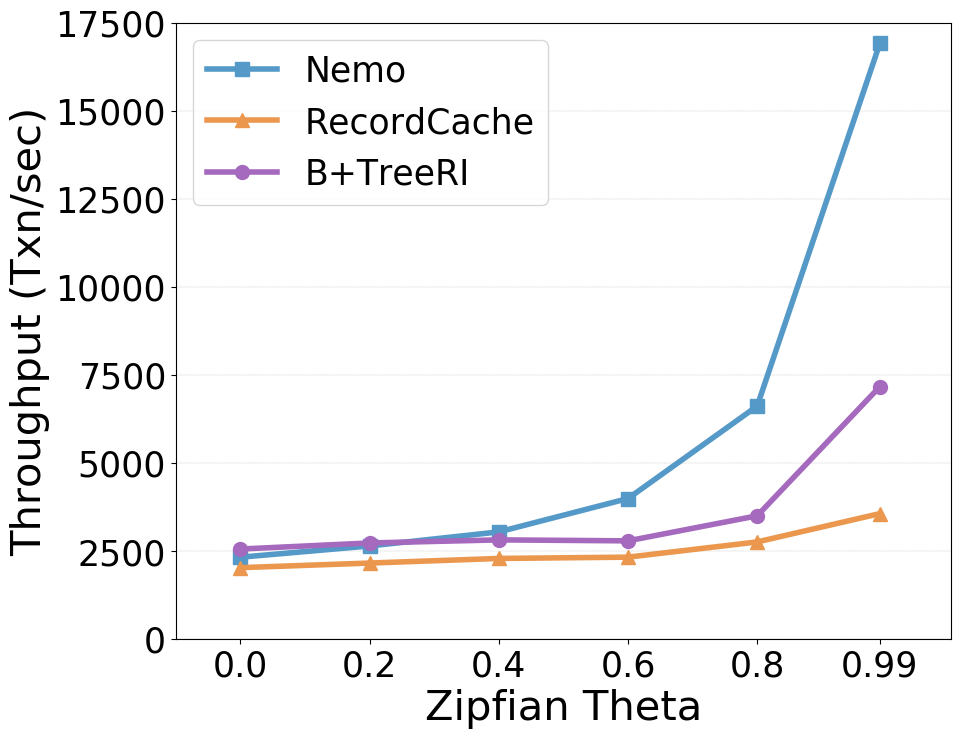

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from process_helper import select_color_idx

txtsize=30
ticksize=25
zipf_theta = 0
color_indices, line_colors = select_color_idx(4)
nemo_batch_evict_c = "#31a354"
nemo_record_evict_c =  "#ea801c"
# # page_retain_c = line_colors["BLUE"]
# page_evict_c = "#78c679"
# tt_retain_c = "#1f6f6f"
# tt_evict_c = "#54a1a1"

x_dimension = "zipf_theta_"
nemo_batch_evict_label = "Nemo"
nemo_record_evict_label = "RecordCache"

datadir = "../../output/negative_search/"
exp_tuple_batch_evict = "negativepoint_varyskew_d2g_tuple_scatter"
exp_tuple_record_evict = "negativepoint_varyskew_d2g_tuple_scatter"
exp_page = "negativepoint_varyskew_d2g_page_scatter"


data_tuple_batch = [json.loads(line) for line in open(datadir + exp_tuple_batch_evict + ".txt")]
data_tuple_batch = [item for item in data_tuple_batch if item["g_negative_search_op_enable"] == "True"]
df_tuple_batch = pd.DataFrame().from_records(data_tuple_batch).sort_values(by=x_dimension)

# data_tuple_record = [json.loads(line) for line in open(datadir + exp_tuple_record_evict + ".txt")]
data_tuple_record = [json.loads(line.replace("inf", "0")) for line in open(datadir + exp_tuple_record_evict + ".txt")]
data_tuple_record = [item for item in data_tuple_record if item["g_negative_search_op_enable"] == "False"]
df_tuple_record = pd.DataFrame().from_records(data_tuple_record).sort_values(by=x_dimension)


data_page = [json.loads(line.replace("inf", "0")) for line in open(datadir + exp_page + ".txt")]
data_page = [item for item in data_page if item["g_negative_search_op_enable"] == "False"]
df_page = pd.DataFrame().from_records(data_page).sort_values(by=x_dimension)



fig, ax1 = plt.subplots(figsize=(10, 8))

line_width= 4
ms = 10
nemo_x = df_tuple_batch[x_dimension]
record_x = df_tuple_record[x_dimension]
page_x = df_page[x_dimension]

nemo_y = df_tuple_batch["throughput_txn_per_sec"]
record_y = df_tuple_record["throughput_txn_per_sec"]
page_y = df_page["throughput_txn_per_sec"]

print(nemo_y)
print(record_y)
print(nemo_y/page_y)
# print(nemo_y)

ax1.plot(nemo_x, 
         nemo_y,
        color=line_colors["BLUE"],
        marker="s", markersize=ms, linewidth=line_width, label="Nemo")

ax1.plot(record_x, 
         record_y,
        color=line_colors["ORANGE"],
        marker="^", markersize=ms, linewidth=line_width, label="RecordCache")

ax1.plot(page_x, 
         page_y,
        color=line_colors["PURPLE"],
        marker="o", markersize=ms, linewidth=line_width, label="B+TreeRI")

ax1.set_xticks(nemo_x)
ax1.set_xticklabels(nemo_x, fontsize=ticksize)

ax1.tick_params(axis='y', labelsize=ticksize)
ax1.tick_params(axis='x', labelsize=ticksize)


ax1.set_ylim(0, 17500)
ax1.set_xlim(-0.1, 1.1)

ax1.set_ylabel("Throughput (Txn/sec)", fontsize=txtsize)
ax1.set_xlabel("Zipfian Theta", fontsize=txtsize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)
ax1.legend(loc='upper left', fontsize=ticksize)



plt.savefig("/home/hippo/Nemo/figures/negativepoint_varyskew_d2g_scatter.pdf",bbox_inches='tight')


## NegativePoint Vary Negative Ratio (Skewed)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


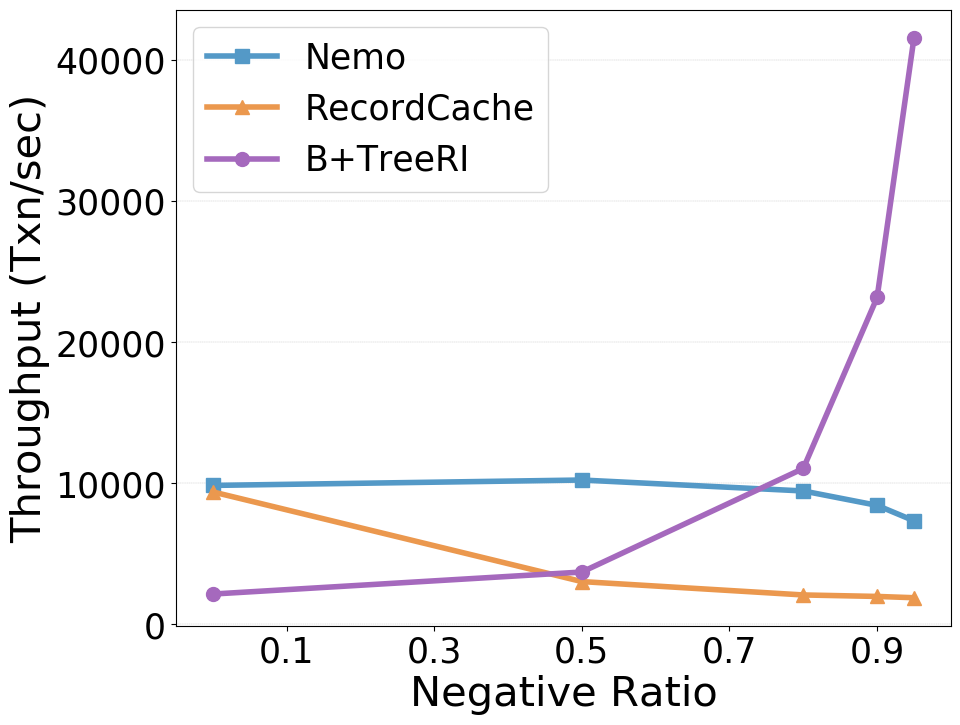

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from process_helper import select_color_idx

txtsize=30
ticksize=25
zipf_theta = 0
color_indices, line_colors = select_color_idx(4)
nemo_batch_evict_c = "#31a354"
nemo_record_evict_c =  "#ea801c"
# # page_retain_c = line_colors["BLUE"]
# page_evict_c = "#78c679"
# tt_retain_c = "#1f6f6f"
# tt_evict_c = "#54a1a1"

x_dimension = "g_total_buf_sz"
nemo_batch_evict_label = "Nemo"
nemo_record_evict_label = "RecordCache"


datadir = "../../output/negative_search/"
exp_tuple_batch_evict = "negativepoint_tuple_varydomain_03buffer_skew_scatter"
exp_tuple_record_evict = "negativepoint_tuple_varydomain_03buffer_skew_scatter"
exp_page = "negativepoint_page_varydomain_03buffer_skew_scatter"


data_tuple_batch = [json.loads(line) for line in open(datadir + exp_tuple_batch_evict + ".txt")]
data_tuple_batch = [item for item in data_tuple_batch if item["g_negative_search_op_enable"] == "True"]
df_tuple_batch = pd.DataFrame().from_records(data_tuple_batch).sort_values(by=x_dimension)

# data_tuple_record = [json.loads(line) for line in open(datadir + exp_tuple_record_evict + ".txt")]
data_tuple_record = [json.loads(line.replace("inf", "0")) for line in open(datadir + exp_tuple_record_evict + ".txt")]
data_tuple_record = [item for item in data_tuple_record if item["g_negative_search_op_enable"] == "False"]
df_tuple_record = pd.DataFrame().from_records(data_tuple_record).sort_values(by=x_dimension)


data_page = [json.loads(line.replace("inf", "0")) for line in open(datadir + exp_page + ".txt")]
data_page = [item for item in data_page if item["g_negative_search_op_enable"] == "False"]
df_page = pd.DataFrame().from_records(data_page).sort_values(by=x_dimension)





fig, ax1 = plt.subplots(figsize=(10, 8))

# bar_width = 0.15
indices = [ 0.1, 0.3, 0.5, 0.7, 0.9]
# offset = bar_width


line_width= 4
ms = 10
domain_size = [1, 2, 5, 10, 20]
negative_ratio = [0, 1/2, 4/5, 9/10, 19/20]
nemo_x = negative_ratio
record_x = negative_ratio
page_x = negative_ratio



nemo_y = df_tuple_batch["throughput_txn_per_sec"]
record_y = df_tuple_record["throughput_txn_per_sec"]
page_y = df_page["throughput_txn_per_sec"]



ax1.plot(nemo_x, 
         nemo_y,
        color=line_colors["BLUE"],
        marker="s", markersize=ms, linewidth=line_width,  label="Nemo")

ax1.plot(record_x, 
         record_y,
        color=line_colors["ORANGE"],
        marker="^", markersize=ms, linewidth=line_width, label="RecordCache")
ax1.plot(page_x, 
         page_y,
        color=line_colors["PURPLE"],
        marker="o", markersize=ms, linewidth=line_width, label="B+TreeRI")


ax1.set_xticks(indices)

ax1.tick_params(axis='y', labelsize=ticksize)
ax1.tick_params(axis='x', labelsize=ticksize)

ax1.set_xlim(-0.05, 1)

ax1.set_ylabel("Throughput (Txn/sec)", fontsize=txtsize)
ax1.set_xlabel("Negative Ratio", fontsize=txtsize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)

# Legend
ax1.legend(loc='upper left', fontsize=ticksize)

plt.savefig("/home/hippo/Nemo/figures/negativepoint_varynegativeratio_scatter.pdf",bbox_inches='tight')

